# **Imports**

In [151]:
# Standard libraries
import numpy as np

# Scikit-learn libraries
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline


# Category encoders
from sklearn.preprocessing import StandardScaler

# Custom libraries
from tools.EDA import EDA
from tools.FeatureEngineeringTool import FeatureEngineeringTool
from tools.SLNNTrainer import SLModelTrainer
from tools.SLNNEvaluator import SLModelEvaluator
from tools.DataLoader import DataLoader
from tools.Preprocessor import Preprocessor


# Custom PyTorch models
from models.PyTorchRegressor import PyTorchRegressor

# **Data Load**

In [152]:
# Step 1: Load Data using DataLoader
data_loader = DataLoader(request_type="local", path="./db/ConcreteStrengthData.csv")
df = data_loader.load_data()

# **EDA**

In [153]:
eda = EDA(df)
eda.perform_full_eda()

Dataset Information:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CementComponent            1030 non-null   float64
 1   BlastFurnaceSlag           1030 non-null   float64
 2   FlyAshComponent            1030 non-null   float64
 3   WaterComponent             1030 non-null   float64
 4   SuperplasticizerComponent  1030 non-null   float64
 5   CoarseAggregateComponent   1030 non-null   float64
 6   FineAggregateComponent     1030 non-null   float64
 7   AgeInDays                  1030 non-null   int64  
 8   Strength                   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


None

,Column,Has_Nulls,Dtype
CementComponent,CementComponent,False,float64
BlastFurnaceSlag,BlastFurnaceSlag,False,float64
FlyAshComponent,FlyAshComponent,False,float64
WaterComponent,WaterComponent,False,float64
SuperplasticizerComponent,SuperplasticizerComponent,False,float64
CoarseAggregateComponent,CoarseAggregateComponent,False,float64
FineAggregateComponent,FineAggregateComponent,False,float64
AgeInDays,AgeInDays,False,int64
Strength,Strength,False,float64



Dataset Shape:

(1030, 9)

Descriptive Statistics:



,count,mean,std,min,25%,50%,75%,max
CementComponent,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
BlastFurnaceSlag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
FlyAshComponent,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
WaterComponent,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
SuperplasticizerComponent,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
CoarseAggregateComponent,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
FineAggregateComponent,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
AgeInDays,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
Strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6



Missing Values:



CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64


Sample Data:



,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [154]:
eda.missing_values_percentage(target="Strength")

Percentage of Missing Values in Each Column:


,Column,Missing Percentage
0,CementComponent,0.0
1,BlastFurnaceSlag,0.0
2,FlyAshComponent,0.0
3,WaterComponent,0.0
4,SuperplasticizerComponent,0.0
5,CoarseAggregateComponent,0.0
6,FineAggregateComponent,0.0
7,AgeInDays,0.0



Summary of Missing Values:


,Average Missing Percentage,Median Missing Percentage,Maximum Missing Percentage,Minimum Missing Percentage,Standard Deviation of Missing Percentage,First Quartile (Q1) of Missing Percentage,Third Quartile (Q3) of Missing Percentage,Interquartile Range (IQR) of Missing Percentage
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


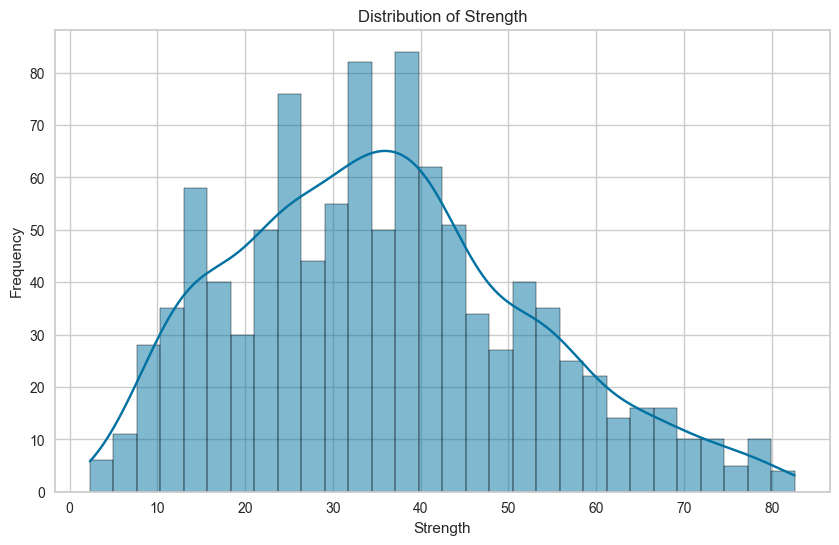

In [155]:
eda.plot_target_distribution("Strength")

# **Feature Engineering**

In [156]:
display(df.columns)

Index(['CementComponent ', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays',
       'Strength'],
      dtype='object')

In [157]:
fet = FeatureEngineeringTool(df)

fet.add_count_feature(
    [
        "CementComponent ",
        "BlastFurnaceSlag",
        "FlyAshComponent",
        "WaterComponent",
        "SuperplasticizerComponent",
        "CoarseAggregateComponent",
        "FineAggregateComponent",
    ]
)


df = fet.df

Added new feature 'Count' with counts of non-zero materials.


In [158]:
display(df)

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength,Count
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99,5
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89,5
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27,5
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05,5
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30,5
...,...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.28,7
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.18,6
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.70,7
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.77,6


In [159]:
eda = EDA(df)

# **Histogram**

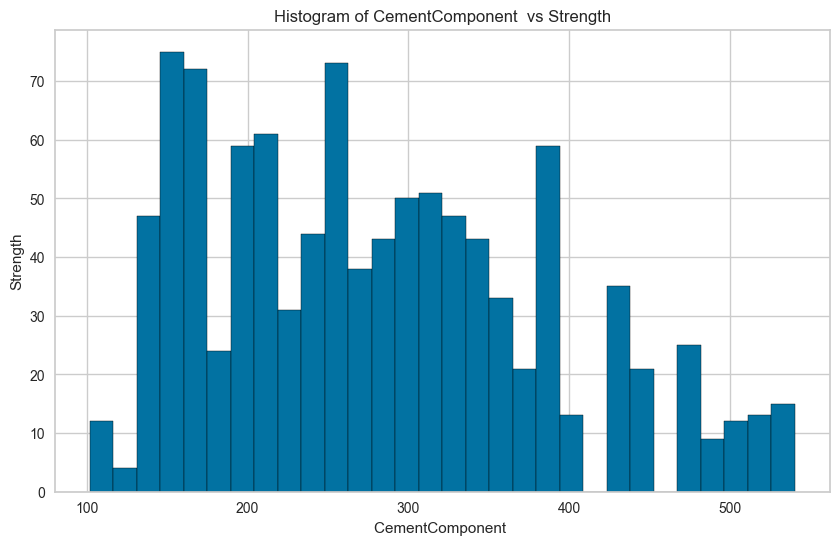

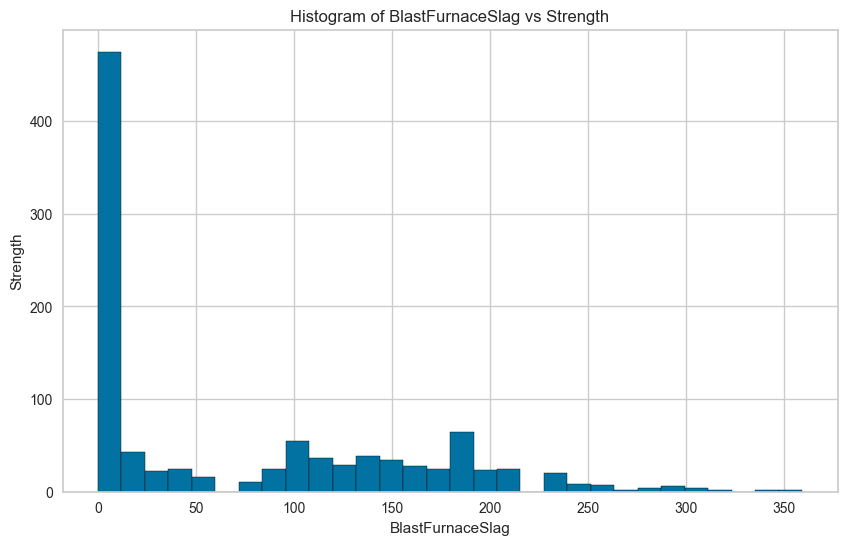

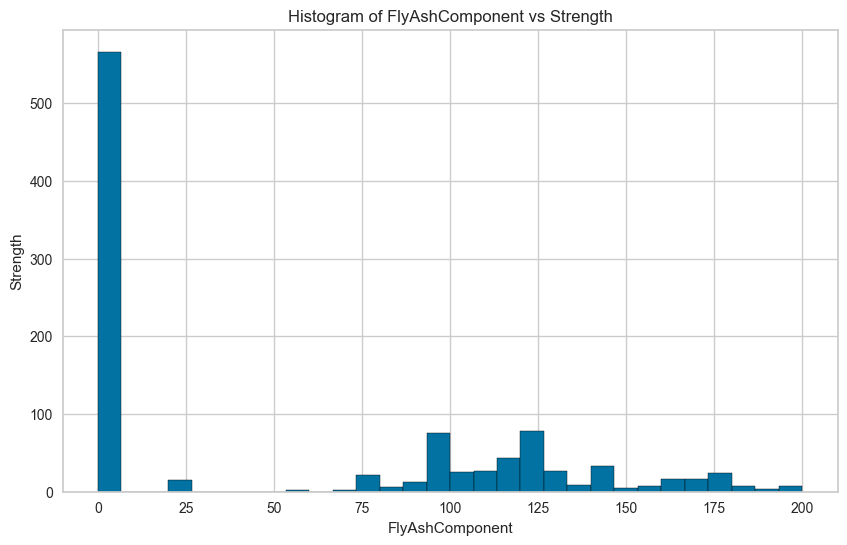

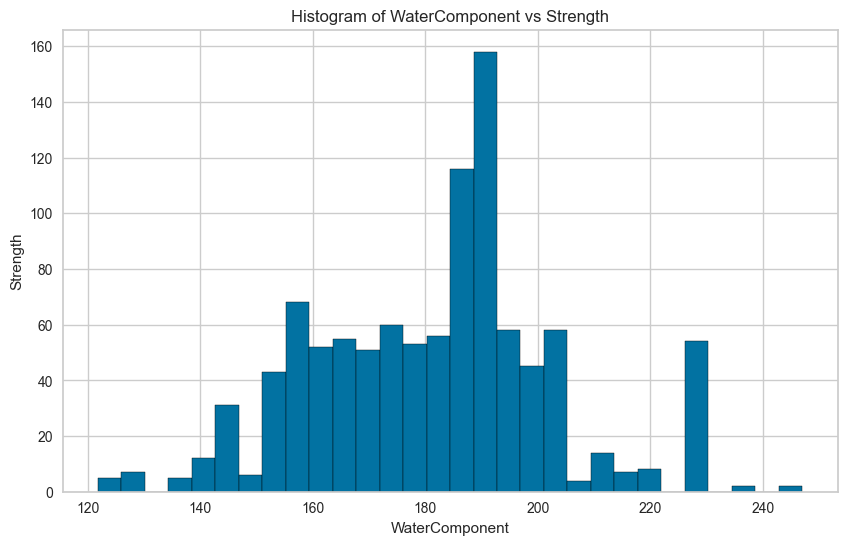

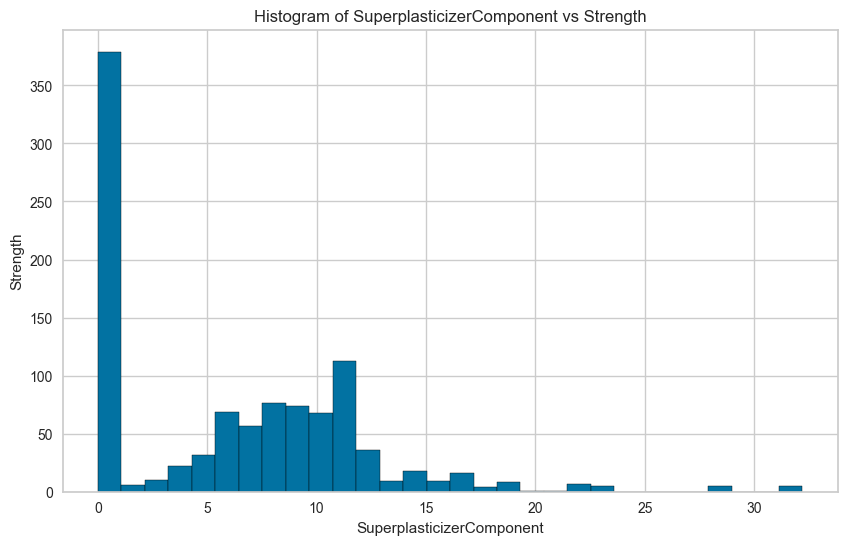

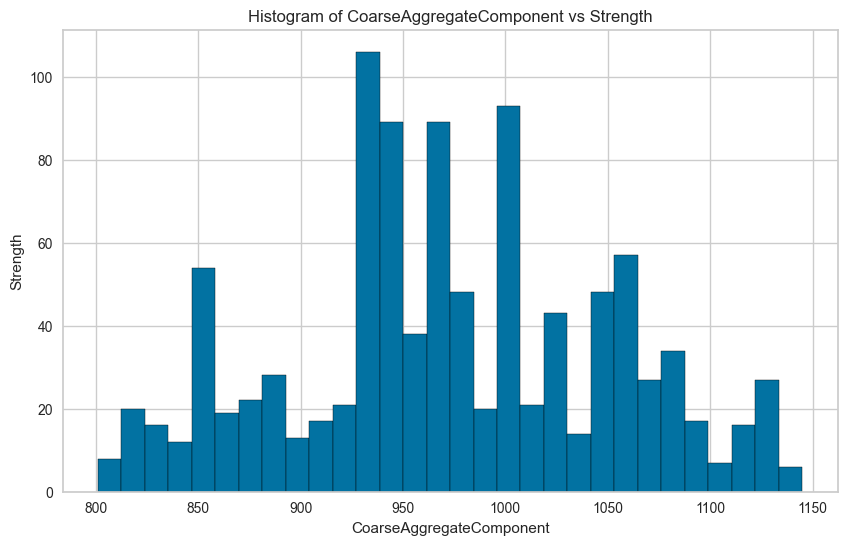

In [160]:
eda.plot_histogram(y="Strength")

# **CM & MI**

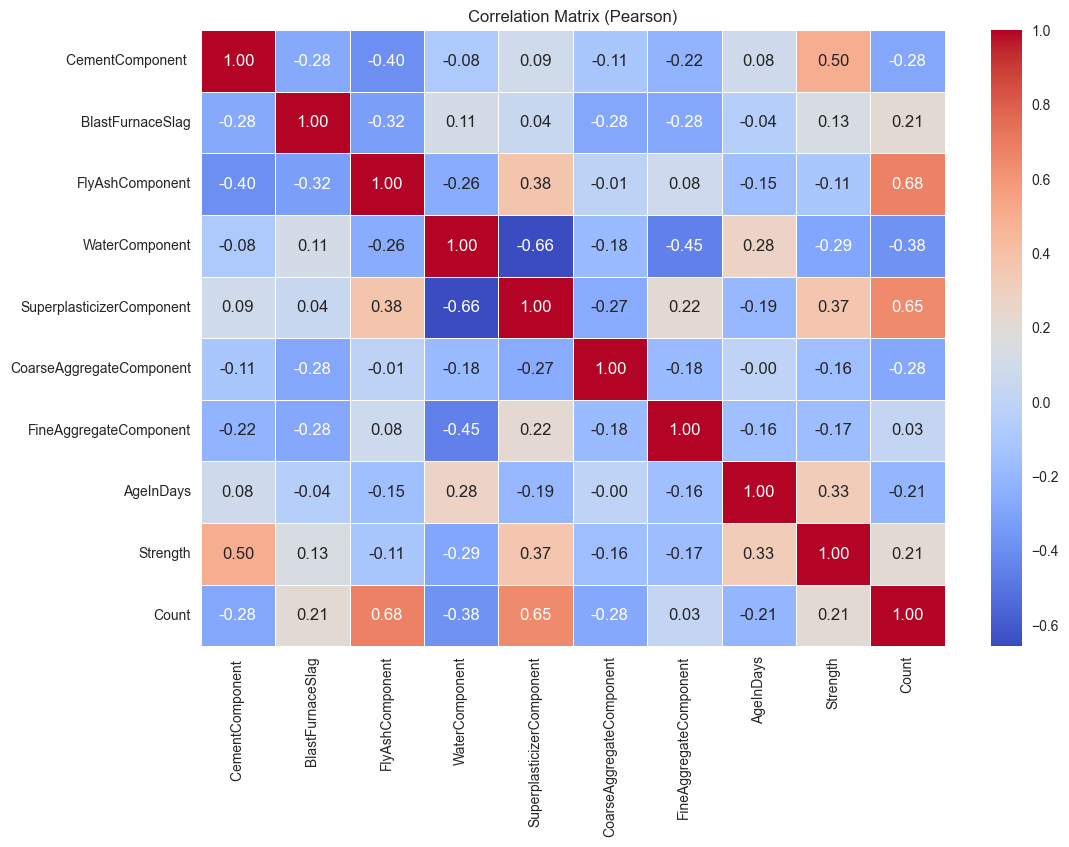

In [131]:
eda.plot_correlation_matrix(method="pearson")

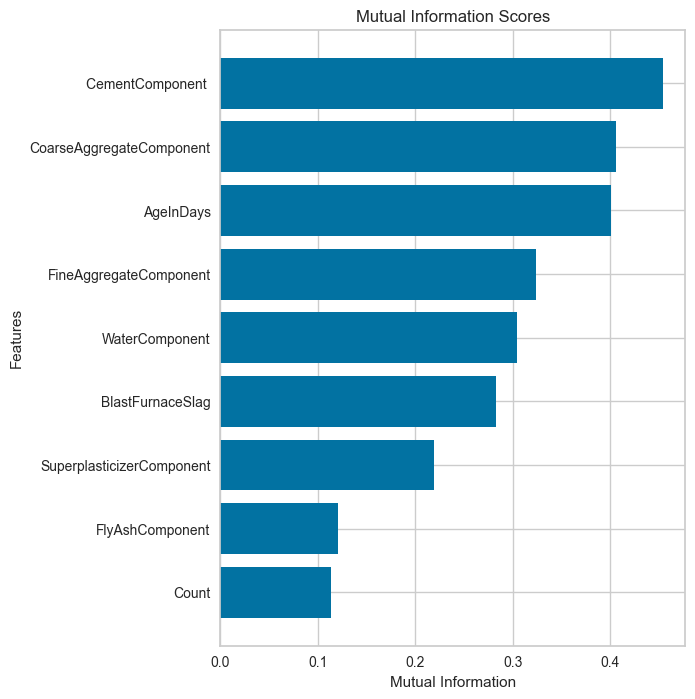

In [132]:
all_features = df.drop(columns=["Strength"]).columns.tolist()

eda.calculate_mutual_information(
    target="Strength", discrete_features=all_features, plot=True
)

# **Pipeline**

In [133]:
X = df.drop(columns=["Strength"])
y = df["Strength"]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [134]:
cat_transformer = Pipeline(
    steps=[
        ("passthrough", "passthrough"),
    ]
)

num_transformer = Pipeline(
    steps=[
        ("scaler", StandardScaler())
    ]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, make_column_selector(dtype_include=np.number)),
        (
            "cat",
            cat_transformer,
            make_column_selector(dtype_include=[object, "category"]),
        ),
    ],
    n_jobs=-1,
)

In [135]:
data_preprocessor = Preprocessor(preprocessor)

In [136]:
X_train_transformed, X_test_transformed = data_preprocessor.fit_transform(
    X_train, X_test
)

/home/nord/.local/lib/python3.12/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


In [137]:
print(type(X_train_transformed))
print(type(y_train))

print(type(X_test_transformed))
print(type(y_test))


print("X_train shape:", X_train.shape[1])
print("X_train_transformed shape:", X_train_transformed.shape[1])

<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'pandas.core.series.Series'>
X_train shape: 9
X_train_transformed shape: 9


In [138]:
input_size = X_train.shape[1]

pipeline = Pipeline(
    steps=[
        ("regressor", PyTorchRegressor(input_size=input_size, epochs_logger=True)),
    ]
)

In [139]:
param_grid = {
    "regressor__hidden_sizes": [[256, 128, 64]],
    "regressor__batch_size": [16],
    "regressor__lr": [0.01],
    "regressor__epochs": [200],
    "regressor__dropout_rate": [0.1],
    "regressor__optimizer_type": ["sgd"],
    "regressor__criterion_type": ["mse"],
}

In [140]:
pipelines = {"pytorch_regressor": pipeline}
param_grids = {"pytorch_regressor": param_grid}

# **Model Training**

In [141]:
model_trainer = SLModelTrainer(task_type="regression", device="cpu")

In [142]:
model_trainer.help()

=== SLModelTrainer Help ===
This trainer supports both regression and classification tasks.

Usage:
1. Initialize the SLModelTrainer with the task type ('regression' or 'classification') and the device ('cpu' or 'cuda').
2. Create a pipeline with preprocessing and the PyTorchRegressor.
3. Define the parameter grid for hyperparameter search.
4. Call the `train` method with the training data, pipeline, and parameter grid.

Parameters:
- X_train : Training data (pandas DataFrame).
- y_train : Target values for the training data (pandas Series).
- X_val : Validation data (optional, pandas DataFrame).
- y_val : Target values for the validation data (optional, pandas Series).
- pipelines : Dictionary of model pipelines.
- param_grids : Dictionary of hyperparameter grids for GridSearchCV.
- scoring : Metric for evaluating models (optional, default depends on task type).
- cv : Number of cross-validation folds (default is 5).
- n_jobs : Number of jobs to run in parallel (default is -1).
- use_

In [143]:
model_trainer.train(
    X_train_transformed,
    y_train,
    pipelines,
    param_grids,
    X_test_transformed,
    y_test,
    scoring="neg_mean_squared_error",
    cv=10,
    verbose=1,
    n_jobs=-1,
    error_score=np.nan,
    use_progress_bar=False,
)

Task type: Regression
Using scoring metric: neg_mean_squared_error
Training on device: cpu
Fitting 10 folds for each of 1 candidates, totalling 10 fits
Epoch 1/200, Training Loss: 1509.043389502992, Validation Loss: 1361.47607421875
Epoch 11/200, Training Loss: 226.0672370423662, Validation Loss: 125.94564056396484
Epoch 1/200, Training Loss: 1486.9874046812665, Validation Loss: 1354.592529296875
Epoch 1/200, Training Loss: 1533.086328384724, Validation Loss: 1404.9793701171875
Epoch 1/200, Training Loss: 1513.0047503532248, Validation Loss: 1408.7037353515625
Epoch 1/200, Training Loss: 1563.5219181141954, Validation Loss: 1479.1124267578125
Epoch 11/200, Training Loss: 218.01523898510223, Validation Loss: 129.11514282226562
Epoch 21/200, Training Loss: 154.25207616927776, Validation Loss: 76.6717529296875
Epoch 1/200, Training Loss: 1560.4495511968084, Validation Loss: 1381.2418212890625
Epoch 1/200, Training Loss: 1511.6453402904754, Validation Loss: 1376.9573974609375
Epoch 11/200,

In [144]:
best_models = model_trainer.best_estimators
best_params = model_trainer.best_params
best_scores = model_trainer.best_scores
best_model_name = model_trainer.best_model_name

In [145]:
# print(best_models)
# print(best_params)
# print(best_scores)
# print(best_model_name)

# **Model Evaluator**

In [146]:
evaluator = SLModelEvaluator()

In [147]:
evaluator.visualize_pipeline(model_name=best_model_name, best_models=best_models)

Visualizing the architecture of the model: pytorch_regressor
Layer (type:depth-idx)                   Param #
├─Linear: 1-1                            2,560
├─ReLU: 1-2                              --
├─Dropout: 1-3                           --
├─Linear: 1-4                            32,896
├─Tanh: 1-5                              --
├─Dropout: 1-6                           --
├─Linear: 1-7                            8,256
├─ReLU: 1-8                              --
├─Dropout: 1-9                           --
├─Linear: 1-10                           2,080
├─Tanh: 1-11                             --
├─Dropout: 1-12                          --
├─Linear: 1-13                           528
├─ReLU: 1-14                             --
├─Dropout: 1-15                          --
├─Linear: 1-16                           17
Total params: 46,337
Trainable params: 46,337
Non-trainable params: 0


In [148]:
evaluator.display_results(
    X_valid=X_test_transformed,
    y_valid=y_test,
    best_models=best_models,
    best_params=best_params,
    best_scores=best_scores,
    best_model_name=best_model_name,
    task_type="regression",
    help_text=True,
)

Extracted PyTorch model: Sequential(
  (0): Linear(in_features=9, out_features=256, bias=True)
  (1): ReLU()
  (2): Dropout(p=0.1, inplace=False)
  (3): Linear(in_features=256, out_features=128, bias=True)
  (4): Tanh()
  (5): Dropout(p=0.1, inplace=False)
  (6): Linear(in_features=128, out_features=64, bias=True)
  (7): ReLU()
  (8): Dropout(p=0.1, inplace=False)
  (9): Linear(in_features=64, out_features=32, bias=True)
  (10): Tanh()
  (11): Dropout(p=0.1, inplace=False)
  (12): Linear(in_features=32, out_features=16, bias=True)
  (13): ReLU()
  (14): Dropout(p=0.1, inplace=False)
  (15): Linear(in_features=16, out_features=1, bias=True)
)
Model is on device: cpu
Evaluation Metrics for Validation Set:


,Model,R²,MAE,MAPE,MSE
0,pytorch_regressor,0.843256,4.768812,0.154958,40.389338



Best Parameters for Each Model (found during cross-validation):


,Model,regressor__batch_size,regressor__criterion_type,regressor__dropout_rate,regressor__epochs,regressor__hidden_sizes,regressor__lr,regressor__optimizer_type
0,pytorch_regressor,16,mse,0.1,200,"[256, 128, 64, 32, 16]",0.01,sgd



Overall Best Model and Score (based on cross-validation score):


,Overall Best Model,Score (based on cross-validation score)
0,pytorch_regressor,38.851957



Metric Explanations for Regression:
R²: Proportion of the variance explained by the model (higher is better).
MAE: Mean Absolute Error, average error magnitude (lower is better).
MAPE: Mean Absolute Percentage Error (lower is better).
MSE: Mean Squared Error (lower is better).


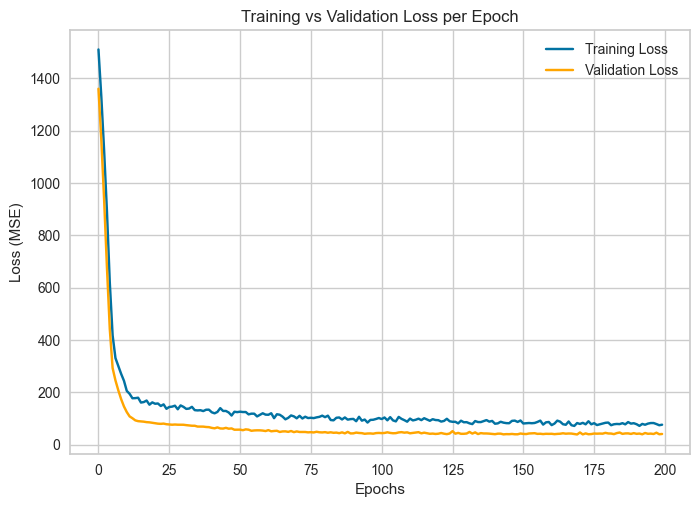

In [149]:
evaluator.plot_loss_history(best_models, best_model_name)

In [150]:
evaluator.validate_on_test(
    X_test=X_test_transformed,
    y_test=y_test,
    best_models=best_models,
    best_model_name=best_model_name,
    task_type="regression",
)

Results for the model on the test set:


,R²,MAE,MAPE,MSE
Model Evaluation,0.843256,4.768812,0.154958,40.389338
